# Project: Investigating the No-show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### No-show Appointments Dataset Description 

> This dataset has to do with patients who books appointment, they're given all the required instructions and yet are able to attend or miss their appointment. It consist of 110527 records(rows) and 14 variables(columns) in all. 

> **Columns names and explanation**
>> **PatientId:** This is the ID of each individual/patient who is books/booked an appointment with a doctor
<br>
**AppointmentID:** The ID assigned to each appointment 
<br>
**Gender:** The gender of the indeividual who booked the appointment. It's in the format F, M where F is for Female and M is for male.
<br>
**ScheduledDay:** The day scheduled for the appointment to take place. It's in datetime format
<br>
**AppointmentDay:** The day they an individual called in to book an appointment
<br>
**Age:** The age of the person/patient who booked the appointment
<br>
**Neighbourhood:** This is where the appointment takes place
<br>
**Scholarship:** This has to do with either the person/patient is under the bolsa Familia scholarship. It's in the form of boolean (0/1), where True means the patient is under the bolsa Familia scholarship and False means they're not.
<br>
**Hipertension:** Whether the person/patient is suffering from hypertension. It's in the form of 0 or 1, where 1 means patient is hypertensive and 0 means patient isn't hypertensive
<br>
**Diabetes:** This column tells us whether the person/patient is suffering from Diabetes. It's in the form of 0 or 1, where 1 means patient is Diabetic and 0 means patient isn't Diabetic
<br>
**Alcoholism:** This column tells us whether the person is into alcoholism or not. It's in the format 0 or 1. where 0 means the patient isn't alcoholic and 1 means patient is an alcoholic
<br>
**Handcap:** Number of handicaps a Patient is having. In other words the number of disabilities a Patient is having
<br>
**SMS_received:** This column has to do with the number of sms received by the patient about the scheduled appointment.
<br>
**No-show:** Whether or not the patient showed up for the appointment. It has a format of Yes or No. it is also the dependent variable/target variable.
<br>


### Question(s) for Analysis

**Here i'll pose my question as a general one**
> **Question**: Does a person's age,  health condition(Hypertension, Diabetes, Disability), Alcoholism, date of scheduled appointment(day of the week if possible), influence the tendency of them missing/making an appointment?

In [1]:
# installing a later version of python so as to use the explode() function.
# Afterwards, import the packages to be used.

!pip install --upgrade pandas==0.25.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### Loading the dataset and general overview of dataset

> In the immediate cell below, I loaded/read the dataset to be used and then went ahead to look at the structure(how many columns and rows are there), format(hyphenations, dashes and etc in the column name), null rows and columns/rows and columns with empty entries and also checked the summary statistics of the dataset in the following cells.

In [2]:
# Read in the dataset to be used for the analysis and look at the top 5 entries in the dataset with .head() function 
# here, I used the read_csv function to read the dataset and store it in the 'df' variable.
# dataset filename is 'noshowappointments-kagglev2-may-2016.csv' which is located in the Database_No_show_appointments folder

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# look at the shape of the dataset to see the number of rows and columns present

df.shape

(110527, 14)

>**There are 110527 rows and 14 columns** in the dataset

In [4]:
# get the names of all the columns to check if there's a need to modify the column names

df.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

>**All column names seem to be okay with the exception of 'No-show' since it has a hyphen in it. 
This is a minor issues because it may lead to breaking code when we use the dot notation to reference that column
Therefore in order to avoid future problems when we use the dot notation in our code,
there's a need to clean that and change the hyphen to an underscore**

In [5]:
# look at the summary statistics of the dataset

df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>### Looking at the summary statistics of the columns and data points, below were some of my findings;

>**(1)** From the information gathered using the .describe() function, it appears that there are no missing values the following columns, patientid, AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handicap, SMS_received.<br><br>
**(2) Age:**  i could see that, there exist a minimum age of -1, which doesn't make a lot of sense and it'll be looked into moving forward. The average age of patients is 37 and 50 percent of patient have their ages around the average(37), with the maximum age being 115 years. <br><br>
**(3) Scholarship:**  In the scholarship column, it appears that more than half of the total number of patients are not on the bolsa Familiar scholarship. <br><br>
**(4) Hipertension:** More than half of the total number of patients are not hypertensive, i.e, more than half of patients do not have hypertension, same applies to Diabetes and alcoholism. <br><br>
**(5) SMS_received:**   More than half of the total number of patients received sms about the scheduled appointments.<br><br>
**(6) Handicap:**  more than half of the total number of patients are not handicaped. There seems to be more than 2 unique values in the Handicap column. Also

In [6]:
# investigating and verifying the number of unique values in some the columns

def unique_count(df):
    '''
    
    function
    -----------------------------------------------------------
    unique_count
    
    
    
    Parameter/Argument    
    -----------------------------------------------------------
    df :dataframe
    
    
    
    returns
    ------------------
    Two dict
    
    1) output_res1: dict
    2) output_res2: dict
    
    ------------------------------------------------------------------
    Where output_res1 contains the column name as keys and he number of unique values in that column
    and output_res2 contains the column name as keys and the total count of the unique values in that column
    
    '''
    
    output_res1, output_res2 = {},{}
    col_list = list(df.columns)
    
    for i, col in enumerate(col_list):
        res1, res2 = {col:df[col].nunique()}, {col: df[col].value_counts()}

        output_res1.update(res1)
        output_res2.update(res2)
    
    
    return output_res1, output_res2

# call the function and pass the dataframe (df) to it

unique_count(df)


({'PatientId': 62299,
  'AppointmentID': 110527,
  'Gender': 2,
  'ScheduledDay': 103549,
  'AppointmentDay': 27,
  'Age': 104,
  'Neighbourhood': 81,
  'Scholarship': 2,
  'Hipertension': 2,
  'Diabetes': 2,
  'Alcoholism': 2,
  'Handcap': 5,
  'SMS_received': 2,
  'No-show': 2},
 {'PatientId': 8.221459e+14    88
  9.963767e+10    84
  2.688613e+13    70
  3.353478e+13    65
  2.584244e+11    62
                  ..
  1.222828e+13     1
  6.821231e+11     1
  7.163981e+14     1
  9.798964e+14     1
  2.724571e+11     1
  Name: PatientId, Length: 62299, dtype: int64, 'AppointmentID': 5769215    1
  5731652    1
  5707080    1
  5702986    1
  5715276    1
            ..
  5586290    1
  5584243    1
  5598584    1
  5602682    1
  5771266    1
  Name: AppointmentID, Length: 110527, dtype: int64, 'Gender': F    71840
  M    38687
  Name: Gender, dtype: int64, 'ScheduledDay': 2016-05-06T07:09:54Z    24
  2016-05-06T07:09:53Z    23
  2016-04-25T17:18:27Z    22
  2016-04-25T17:17:46Z    22

In [7]:
# checking for duplicated entries in the whole dataset, so as to do data cleaning on them
# df.size will give us the total number of entries in that subset of the dataframe.

print(df[df.duplicated()==True].size, (df['PatientId'].duplicated() == True).sum())

0 48228


In [8]:
# checking for null values  in the dataset

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the above summary of zeros in all the rows, it shows that there are no null values in the dataset.

In [9]:
# checking for unique value counts of the neighbourhood column

df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The above results from the pd.info() function returns the data types and total number of entries in each column.
PatientId          float64 <br>
AppointmentID      int64<br>
Gender             object<br>
ScheduledDay       object<br>
AppointmentDay     object<br>
Age                int64<br>
Neighbourhood      object<br>
Scholarship        int64<br>
Hipertension       int64<br>
Diabetes           int64<br>
Alcoholism         int64<br>
Handcap            int64<br>
SMS_received       int64<br>
No-show            object<br>

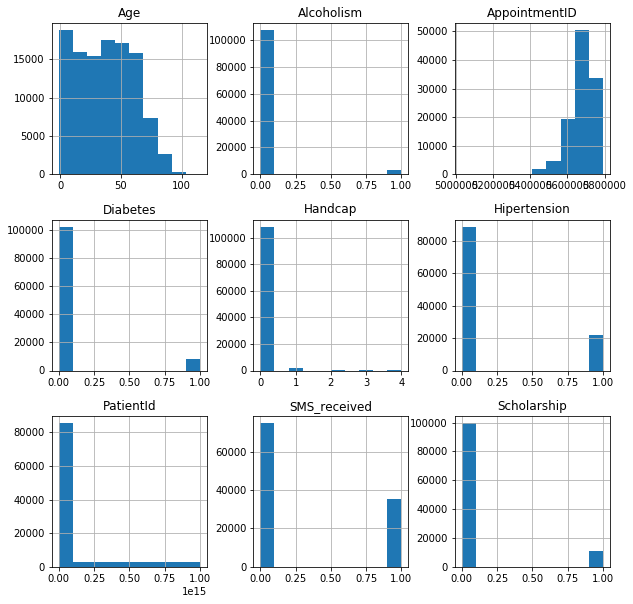

In [11]:
# Distribution of the data points

df.hist(figsize=(10,10));

#### From the above plots, it can be concluded that ;
>**(1)** Variables including Alcoholism, Diabetes, Handcap, Hipertension and Scholarship are having much less number of ones than zeros. This implies that the dataset is not fairly distributed.<br>
**(2)** Handcap also has just a few values that are not zero, meaning very few patients are handicaped and the few that have handicaps also have from one to four handicaps.<br>
**(3)** Lastly, this dataset seems to be imbalanced.

### Reasoning behind the use of my user defined function (unique_count())

>**I used this function because i wanted to generate the number of unique value counts and also the various unique values for all columns in just one execution. I didn't want to check it one by one for every column. So function eliminates that task of running multiple df.value_counts() and df.nunique() function calls**
<br><br>

### From the just above function execution, these were some of my findings;
>**(1)** There is one entry which has age to be -1 and since his doesnt make sense, it'll be dropped.<br>
**(2)** There are 5 unique values for Handicap from 0 to 4. In my EDA, I'll focus on only 0 and 1 since we're interested in the behaviours of those who are handicaped versus those who are not. This coloumn is not really clear as to what the interperatation of the numbers 0,1,2,3,4 mean. I was expecting it to be only 0 and 1 which signifies A non handicaped patient and A handicaped patient respectively.Also this could mean that a patient has more than one handicap that's why we have from 2 to 4 where 4 means a patient has 4 handicaps  <br> 
**(3)** The following columns have only two unique values, Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received.<br>
**(4)** If we look at the PatientId in its format it is seen that, there are duplicated PatientId, this is true but they're not having the same set of features across all the columns hence no duplicate entries when we checked for duplicates in the whole dataset. This behaviour is because, the PatientId is in a format of truncated long number which is being treated as similar entries. If we're to write all the digits of the patientId, there wouldnt be any duplicates in the patientId column.<br>
**(5)** Moving forward, we'll drop the PatientId column and the AppointmentId column since i will treat them as unique for every entry and not much EDA can be done on them. Although it appears that a single patuent booked more than one appointment<br>
**(6)** Lastly, scheduledDay and AppointmentDay are in object data types, which could be converted to proper datetime format



### Data Cleaning
> **To-Do:** In this step (data cleaning), these are some of the minor issues i would like to resolve.<br>
 **(1)** Drop PatientId and AppointmentId columns.<br>
 **(2)** Drop the the row where the age is -1.<br>
 **(3)** Rename the No-show column to No_show.<br>
 **(4)**Try and convert the object columns of both ScheduledDay and AppointmentDay to a datatime data type and get the day of the week from it for further analysis


In [12]:
# dropping PatientId and AppointmentId column from the dataset

df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# renaming the No-show column to No_show column

df.rename(columns={'No-show':'No_show'}, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# converting the object data type of both ScheduledDay and AppointmentDay to a datatime data type
# Here I used the pd.to_datetime function 

df[['ScheduledDay','AppointmentDay']] = df[['ScheduledDay','AppointmentDay']].apply(pd.to_datetime)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# checking to confirm that, the object data type of the AppointmentDay and ScheduledDay 
# are indeed converted to datetime formats


df[['ScheduledDay','AppointmentDay']].dtypes

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

In [16]:
# Get day of week from the datetime of both ScheduledDay,AppointmentDay
# here, I used the dt.day_name() to get the name of the day from the date.

df['day_scheduled'] = df['ScheduledDay'].dt.day_name()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,day_scheduled
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [17]:
# getting the name of the day a patient called to book an appointment

df['bookingDay'] = df['AppointmentDay'].dt.day_name()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,day_scheduled,bookingDay
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


> A new dataset containing two added columns namely, day_scheduled and bookingDay which are in day formats

In [18]:
# drop the row containing age =-1,
# first get the index of that particular row and pass it to df.drop() function

df.loc[df['Age'] == -1]
df = df.drop(99832, axis=0)

> The row where age = -1 was located in index 99832, so we used that index together with pd.drop in order to remove that row from the dataset

In [19]:
# check to verify that one rwo has been dropped
df.shape

(110526, 14)

In [20]:
# verify that the Age column doesn't contain -1 value

df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

### Summary of what was done during the data cleaning process

> - I dropped the PatientId and AppointmentID column because they seemed not to contain any relevant information for the purposes of EDA. 
- I dropped the row with Age= -1 because age should always be a positive number, and -1 is inappropriate
- I also changed the name of the 'No-show' column to 'No_show' for easy usage of the column name in terms of dot notation. e.g. I can do df.No_show.value_counts() but cannot do df.No-show.value_counts()
- Then again, i derived the day name from the datetime columns, i.e., ScheduledDay and AppointmentDay and formed two new columms namely day_scheduled and bookingDay to help us study the relationship between day of the week and patients showing up or not showing up for appointments

<a id='eda'></a>
## Exploratory Data Analysis


### 1.  Is the age of a patient have any impact on whether they show or not show up for an appointment?

In [21]:
#what i did: To investigate the age of patients, i segmented the age column into 3 different age group and analyzed them individually for trends

# segment age into different age groups by querying the dataframe for the various age groups.
# Here i created 3 different age groups and stored them in their individual variables. 

old_patients = df.query('Age >=60')
adult_patients = df.query('Age >=20 and Age < 60')
adolescent_patients = df.query('Age <=19')

(old_patients.shape[0], adult_patients.shape[0], adolescent_patients.shape[0])


(21173, 58942, 30411)

In [22]:
# check to see if all age group are not repeated for other age groups


(old_patients.shape[0]+ adult_patients.shape[0]+ adolescent_patients.shape[0])

110526

In [23]:
old_patients.No_show.value_counts()

No     17931
Yes     3242
Name: No_show, dtype: int64

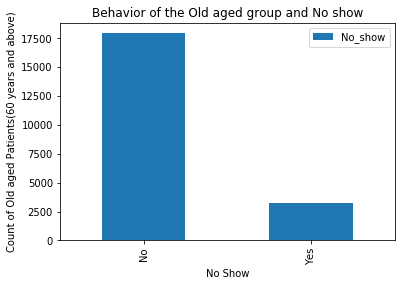

In [24]:
ax = old_patients.No_show.value_counts().plot(kind='bar',title='Behavior of the Old aged group and No show', legend=True)
ax.set(xlabel='No Show', ylabel='Count of Old aged Patients(60 years and above)');

> From the above plot, there exists very few occurances where patients in the old age group missed their appointments

In [25]:
adult_patients.No_show.value_counts()

No     46606
Yes    12336
Name: No_show, dtype: int64

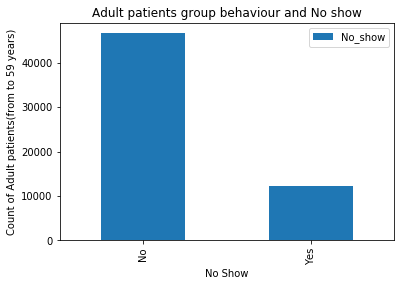

In [26]:
# Make and display the plot of Adult patients and No_show trend.

ax = adult_patients.No_show.value_counts().plot(kind='bar', title='Adult patients group behaviour and No show', legend=True)
ax.set(xlabel='No Show', ylabel='Count of Adult patients(from to 59 years)');

> From the above plot showing the Adult Patients group and No_show, it is observed that there exists a high number of patients who missed their appointments. Much more than those in the old age patients group

In [27]:
adolescent_patients.No_show.value_counts()

No     23670
Yes     6741
Name: No_show, dtype: int64

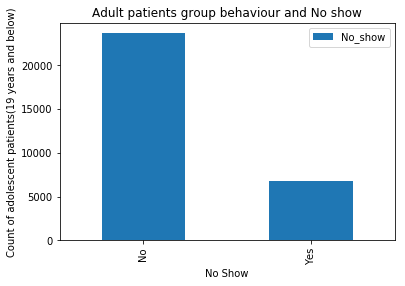

In [28]:
# Plotting the adolescent age group and No show

ax = adolescent_patients.No_show.value_counts().plot(kind='bar', title='Adult patients group behaviour and No show', legend=True)
ax.set(xlabel='No Show', ylabel='Count of adolescent patients(19 years and below)');

> This plot shows that patients in the adolescent group have much higher number of missed appointments as compared to that of the patients in the old age group

### Relationship between Age of patient and No_show

> For the Age Feature, it appeared that the number of no show appointments increased in the middle/adult age group as compared to a reduced one in the old age group. This implies that Patient tend to make time for appointments when they turn older as compared to the working class age

### 2.  Does the alcoholism condition of a patient have any influence/impact on whether they show or not show up for an appointment?

In [29]:
# Get the sub-dataset containing only patients who are Alcoholics and count.

alcoholics = df.query('Alcoholism ==1').groupby('No_show')['Alcoholism'].count()
alcoholics

No_show
No     2683
Yes     677
Name: Alcoholism, dtype: int64

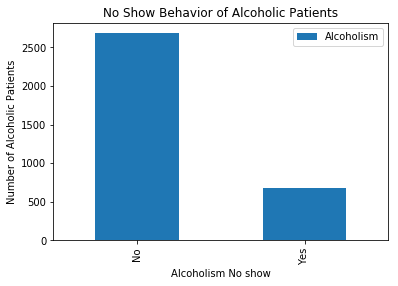

In [30]:
# plotting the bar chart of No show(Yes/No) against Alcoholic Patients    

ax = alcoholics.plot(kind='bar', title='No Show Behavior of Alcoholic Patients', legend=True)
ax.set(xlabel='Alcoholism No show', ylabel='Number of Alcoholic Patients');

> From the above plot showing Patients with Alcoholism, it can be seen that the number appointments missed for Alcoholism patients is very less

In [31]:
# getting the sub-dataset of containing only Non-alcoholic Patients

non_alcoholics = df.query('Alcoholism ==0').groupby('No_show')['Alcoholism'].count()
non_alcoholics

No_show
No     85524
Yes    21642
Name: Alcoholism, dtype: int64

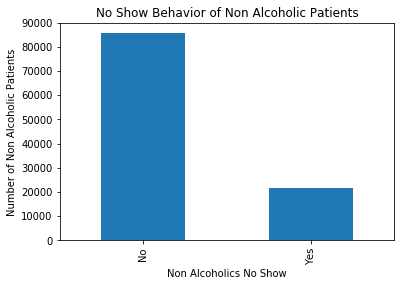

In [32]:
# Plotting the bar chart of No_show against Non-Alcoholic Patients

ax = non_alcoholics.plot(kind='bar', title='No Show Behavior of Non Alcoholic Patients');
ax.set(xlabel='Non Alcoholics No Show', ylabel='Number of Non Alcoholic Patients');

> From the above plot showing Non Alcoholism patients, it can be seen that the number of missed appointments here is much more higher as compared to that of the patients Alcoholism

### Alcoholism
> From the above bar plots, the number of patients who didn't show up for appointments is relatively high in Non Alcholic patients as compared to that of Alcoholic Patients. In order words, Patients who are addicted to Alcohol are more likey to attend their appointments and those not addicted to alcohol are more likely to not show up for their appointments. Also it can be said that, patients who are non alcoholics booked more appointments than those who are alcoholics and this explains the high no show rate on the part of non alcoholics

### 3.  Does the Health condition(Handicap, Diabetes, Hipertension),  of a patient have any influence/impact on whether they show or not show up for an appointment?

### Handicap and No Handicap

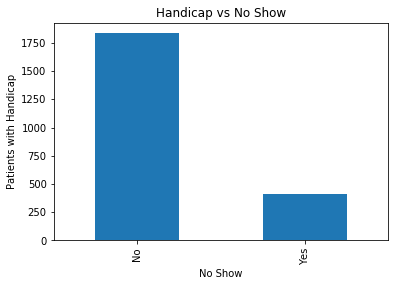

In [33]:
# Getting Patients who are handicaped (having either 1,2,3, 4 handicaps), count them and groupby No_show

handicaped = df.query(' Handcap != 0' ).groupby('No_show')['Handcap'].count()
ax = handicaped.plot(kind='bar', title='Handicap vs No Show')
ax.set(xlabel='No Show', ylabel='Patients with Handicap');

> From the above plot showing patients with Handicaps, it can be seen that there exist a very less number of missed appointments for this group, i.e, Patients with Handicaps

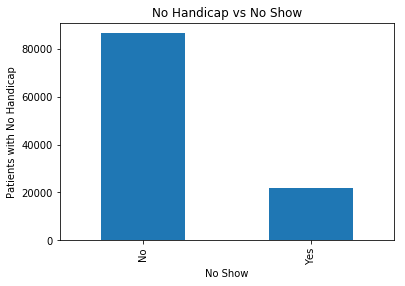

In [34]:
no_handicap = df.query(' Handcap == 0').groupby('No_show')['Handcap'].count()
ax = no_handicap.plot(kind='bar', title='No Handicap vs No Show')
ax.set(xlabel='No Show', ylabel='Patients with No Handicap');

> From the above plot showing the behavior of patient with No Handicaps, it can be seen that there is a very high number of missed appointments here.

In [35]:
df.query(' Handcap != 0' ).groupby('No_show')['Handcap'].count()

No_show
No     1834
Yes     407
Name: Handcap, dtype: int64

> From the above three(3) cells, it could be explained that patients who have no handicap booked more appointments as compared o those who have 1 or more handicaps. The number of missed appointments in patients without handicap is very high as compared to those with handicap, and this makes sense since Patients with one or more handicaps may find it difficult moving from one destination to the other.

### Diabetes and No Diabetes

In [36]:
# get patients with Diabetes

diabetic = df.query('Diabetes==1') 
diabetic

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,day_scheduled,bookingDay
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday
36,F,2016-04-29 07:35:19+00:00,2016-04-29 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,Friday,Friday
37,F,2016-04-29 07:35:56+00:00,2016-04-29 00:00:00+00:00,64,TABUAZEIRO,1,1,1,0,0,0,No,Friday,Friday
41,F,2016-04-28 09:20:36+00:00,2016-04-29 00:00:00+00:00,71,MARUÍPE,0,0,1,0,0,0,No,Thursday,Friday
44,F,2016-04-28 13:27:27+00:00,2016-04-29 00:00:00+00:00,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,Thursday,Friday
47,F,2016-04-28 08:51:26+00:00,2016-04-29 00:00:00+00:00,39,MARUÍPE,0,1,1,0,0,0,No,Thursday,Friday
73,F,2016-04-06 18:12:38+00:00,2016-04-29 00:00:00+00:00,68,REPÚBLICA,0,1,1,0,0,1,No,Wednesday,Friday
112,F,2016-04-18 11:05:04+00:00,2016-04-29 00:00:00+00:00,59,SANTO ANTÔNIO,0,1,1,0,0,1,No,Monday,Friday
126,F,2016-04-28 09:37:22+00:00,2016-04-29 00:00:00+00:00,67,PRAIA DO SUÁ,0,0,1,0,0,0,Yes,Thursday,Friday
127,M,2016-04-08 10:14:36+00:00,2016-04-29 00:00:00+00:00,42,PRAIA DO SUÁ,0,1,1,0,0,1,No,Friday,Friday


> From the above cell, total number of patients with Diabetes condition is 7943

In [37]:
# getting the average age of patients with Diabetes 
diabetic.Age.mean()

61.37252927105627

In [38]:
# getting the average age of patients with no diabetes

non_diabetic = df.query('Diabetes ==0 ')
non_diabetic.Age.mean()

35.20896249865962

> The mean age of a patient suffering from Diabetes is 61, which means that Diabetes is more prevalent in Old aged patients as compared to Adolescents and Adults in the working class age(age <60).

In [39]:
# getting the No_show count of patient with diabetes..

diabetic.No_show.value_counts()

No     6513
Yes    1430
Name: No_show, dtype: int64

In [40]:
# getting the No_show count of patients with no diabetes

non_diabetic.No_show.value_counts()

No     81694
Yes    20889
Name: No_show, dtype: int64

> Comparing diabetic and non diabetic patients, the number of patients who failed to show for appointments is less in diabetic patients. This implies that, patients with no diabetes are more likely to miss an appointment

### Hypertension and No Hypertension

In [41]:
# getting the set of hypertensive patients
# checking for the average age of hypertensive patients


hypertensive = df.query('Hipertension ==1')
hypertensive.Age.mean()

60.61359570661896

In [42]:
# getting the set of patients with no hypertension 
# getting the average age a patients with no hypertension

non_hypertensive = df.query('Hipertension ==0')
non_hypertensive.Age.mean()

31.30894336432798

> Comparing the average ages of patients with or without hypertension, it was found that hypertension is also more prevalent in old aged patients.

### No show vs Hypertension and No Hypertension

In [43]:
hypertensive.No_show.value_counts()

No     18029
Yes     3772
Name: No_show, dtype: int64

> Number of patients with hypertension who missed their appointments is 3772 and those with hypertension who didn't miss their appoinments is 18029

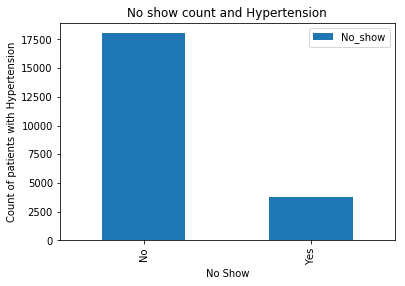

In [44]:
# getting the No_show count of patients with hypertension

ax = hypertensive.No_show.value_counts().plot(kind='bar', title='No show count and Hypertension', legend=True)
ax.set(xlabel='No Show', ylabel='Count of patients with Hypertension');

> It can be seen from the above plot that patients with hypertension condition who missed their appointments is very less

In [45]:
non_hypertensive.No_show.value_counts()

No     70178
Yes    18547
Name: No_show, dtype: int64

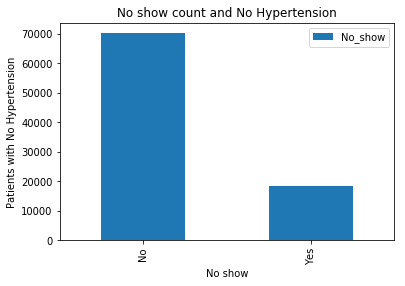

In [46]:
ax = non_hypertensive.No_show.value_counts().plot(kind='bar', title='No show count and No Hypertension', legend=True)
ax.set(xlabel='No show', ylabel='Patients with No Hypertension');

> from the above plot, it can be viewed that patients with no hypertension condition missed more of their appointments as compared to the previous plot where patients with hypertension missed few of their appointments

> According the above analysis, patients with hypertension are more likely to show up for their appointments as compared to patients with no hypertension.

### 4. Does the day of the week of the scheduled appointment  and the days interval between day of booking appointment and scheduled day for the appointment have any influence/impact on whether they show or not show up for an appointment?

In [47]:
# getting the count of the day of the week for patients who missed their appointments

# dayofweek_count = 
df.day_scheduled.nunique()

6

In [48]:
df.day_scheduled.value_counts()

Tuesday      26168
Wednesday    24262
Monday       23084
Friday       18915
Thursday     18073
Saturday        24
Name: day_scheduled, dtype: int64

### As seen in the above cell;
> **(a)** There are no appointments scheduled on sundays, could this mean that staff don't work on sundays and if that's the case then why?<br>**(b)**. There are only few appointments scheduled on Saturdays.<br> **(c)**. Tuesdays have more scheduled appointments than any other day


In [49]:
df.groupby('day_scheduled')['No_show'].value_counts()

day_scheduled  No_show
Friday         No         15028
               Yes         3887
Monday         No         18523
               Yes         4561
Saturday       No            23
               Yes            1
Thursday       No         14373
               Yes         3700
Tuesday        No         20877
               Yes         5291
Wednesday      No         19383
               Yes         4879
Name: No_show, dtype: int64

> The above table show the No_show(whether Yes/No) of the various scheduled days

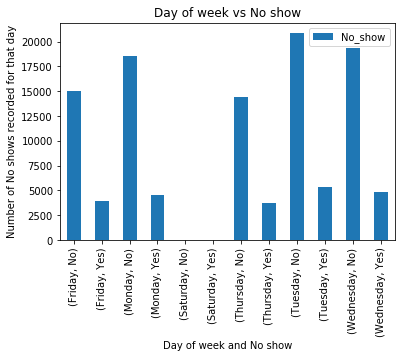

In [50]:
# Visualizing day_scheduled and No_show using a bar plot

ax = df.groupby('day_scheduled')['No_show'].value_counts().plot(kind='bar', title='Day of week vs No show', legend=True)
ax.set(xlabel='Day of week and No show', ylabel='Number of No shows recorded for that day');

> From the above cell, apart from saturday which relatative has fewer number of scheduled appointments, Thursday had the least Number of No shows throughout the week. This means that, patients are more likely to show up for appointments when the scheduled day for that particular appointment is Thursday

#### Now let's check day interval between the appointment date and scheduled date to see if the days interval influences the tendency of patients not showing up for appointments

In [51]:
# create a new df containing the day interval between the appointment day and scheduled day
# but before that, let's check for days that are lagging behind


df['days_interval'] = (df.AppointmentDay - df.ScheduledDay).dt.days
df.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,day_scheduled,bookingDay,days_interval
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday,34
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday,34
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday,40
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday,40
110526,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday,40


> This new dataframe consists of 'days_interval' column that shows the day difference between the day the appointment was made and the day that was scheduled for the actual appointment. This new column was created to investigate further, if the waiting duration has an impact on No show appointments. 

In [52]:
# getting the days that are lagging behind the day of appointment

no_daydiff = df.query('days_interval <= 0')

In [53]:
no_daydiff.No_show.value_counts()

No     40870
Yes     2910
Name: No_show, dtype: int64

> **From the above cell executed, it can be seen that some of the scheduled days are lagging behind the appointment days. In other words patients are scheduled for days that are already in the present/past**<br>
> **Also, this may be due to the fact that some of these appointments were scheduled on the same day as the appointment day or even may not have been scheduled at all and this could lead to a no show.**

In [54]:
# let's check for day intervals greater than or equal to 1.

more_daydiff = df.query('days_interval > 1')

In [55]:
more_daydiff.No_show.value_counts()

No     42214
Yes    17807
Name: No_show, dtype: int64

> More days interval may lead to missed appointment since patients may even forget it's their appointment day. Then again, there seems to be more instances that patients failed to show up when patients had more than a single day interval

<a id='conclusions'></a>
## Conclusions

> In response to the general question I posed in the beginning of this analysis, the following were my resolutions that were made during my quest to answer the questions in totality. The general question was broken down during the analysis to help me come up with my final discussions. Below are some of the individual questions that were asked in order to resolve the main general question.

> ### 1. Is the age of a patient have any impact on whether they show or not show up for an appointment?
> I discovered that, the old aged patients did not miss as much appointments as compared to the adolescents and adult age. Simply put, as a person age increases there's is a high chance that they will show up for appointments regularly.

>### 2.  Does the alcoholism condition of a patient have any influence/impact on whether they show or not show up for an appointment?
> I also realised that, the alcoholism status of patients has less to No impact on whether they will show up for appointments or not. There's exist No clear way of relating alcoholism to No show appointments


>### 3.  Does the Health condition(Handicap, Diabetes, Hipertension),  of a patient have any influence/impact on whether they show or not show up for an appointment?
> The health condition such as a patient being Handicaped, being Diabetic and Hypertensive have influence on no show appointments in the sense that, patient who are Handicaped, Diabetic or Hypertensive have low number os no show as compared to those without these same conditions.



>### 4. Does the day of the week of the scheduled appointment  and the days interval between day of booking appointment and scheduled day for the appointment have any influence/impact on whether they show or not show up for an appointment?
>There is an increased number of no show(s) when the number of days interval between appointment and scheduled day is larger. Meaning, the high the number of day intervals the higher the number of no shows. Also, when appointments are scheduled on thursdays, there is a high number of patients who show up for their appointment as compared to other days.


>### Limitation

> During my EDA, I realized that this dataset is an example of imbalanced dataset. There seems to be more datapoints which were labelled as 'No' for the target/independent variable. Imbalance datasets have an impact on the conclusions drawn since it'll always favor a particular subset of the whole dataset. Also, information on this dataset is not very clear in communicating the meaning of the variables and this led to a confusion, for instance the 'Handcap' column has 5 unique values for patients with 0 ,1 or more handicaps. This is confusing because it is also stated that the SMS_received column has to do with number of SMS received which can also be in a range of 0 to 4, but here it is labelled as 0 or 1. It might be tempting to swap the columns 'Handcap' and 'SMS_received'.






In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0